In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [27]:
file_path = "data/hand_landmarks_data.csv"  
df = pd.read_csv(file_path)

In [28]:
df.head().to_csv("sample_data.csv", index=False)

In [29]:
print("\n🔍 null count")
print(df.isnull().sum())


🔍 null count
x1       0
y1       0
z1       0
x2       0
y2       0
        ..
z20      0
x21      0
y21      0
z21      0
label    0
Length: 64, dtype: int64


In [30]:
landmark_columns = [col for col in df.columns if col.startswith(("x", "y"))]

In [31]:
landmark_columns

['x1',
 'y1',
 'x2',
 'y2',
 'x3',
 'y3',
 'x4',
 'y4',
 'x5',
 'y5',
 'x6',
 'y6',
 'x7',
 'y7',
 'x8',
 'y8',
 'x9',
 'y9',
 'x10',
 'y10',
 'x11',
 'y11',
 'x12',
 'y12',
 'x13',
 'y13',
 'x14',
 'y14',
 'x15',
 'y15',
 'x16',
 'y16',
 'x17',
 'y17',
 'x18',
 'y18',
 'x19',
 'y19',
 'x20',
 'y20',
 'x21',
 'y21']

In [32]:
df = df.drop(columns=[col for col in df.columns if col.startswith("z")])


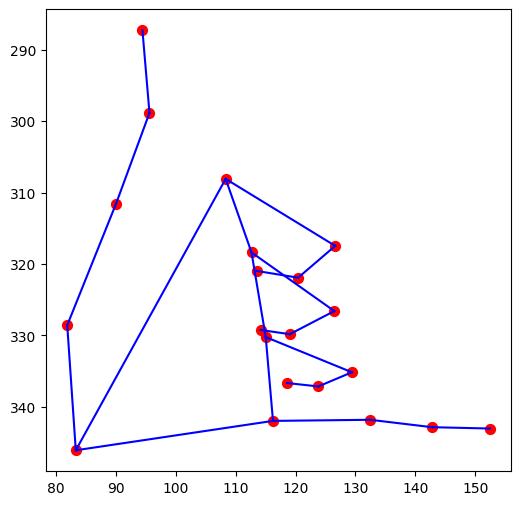

In [33]:
sample = df.iloc[1, :-1]  
x_values = sample[::2].values 
y_values = sample[1::2].values  
hand_connections = [
    (0, 1), (1, 2), (2, 3), (3, 4), 
    (0, 5), (5, 6), (6, 7), (7, 8),  
    (5, 9), (9, 10), (10, 11), (11, 12), 
    (9, 13), (13, 14), (14, 15), (15, 16), 
    (0, 17), (13, 17), (17, 18), (18, 19), (19, 20) 
]
plt.figure(figsize=(6, 6))
plt.scatter(x_values, y_values, color='red', s=50, label="Landmarks")
for connection in hand_connections:
    plt.plot(
        [x_values[connection[0]], x_values[connection[1]]],
        [y_values[connection[0]], y_values[connection[1]]],
        color='blue'
    )
plt.gca().invert_yaxis()
plt.show()


In [34]:
wrist_x, wrist_y = df["x1"], df["y1"]
df[landmark_columns] = df[landmark_columns].apply(lambda col: col - (wrist_x if "x" in col.name else wrist_y))


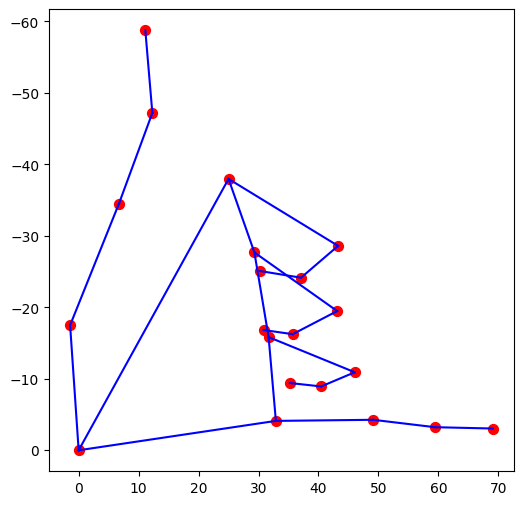

In [35]:
sample = df.iloc[1, :-1]  
x_values = sample[::2].values 
y_values = sample[1::2].values  
hand_connections = [
    (0, 1), (1, 2), (2, 3), (3, 4), 
    (0, 5), (5, 6), (6, 7), (7, 8),  
    (5, 9), (9, 10), (10, 11), (11, 12), 
    (9, 13), (13, 14), (14, 15), (15, 16), 
    (0, 17), (13, 17), (17, 18), (18, 19), (19, 20) 
]
plt.figure(figsize=(6, 6))
plt.scatter(x_values, y_values, color='red', s=50, label="Landmarks")
for connection in hand_connections:
    plt.plot(
        [x_values[connection[0]], x_values[connection[1]]],
        [y_values[connection[0]], y_values[connection[1]]],
        color='blue'
    )
plt.gca().invert_yaxis()
plt.show()


In [9]:
df

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y17,x18,y18,x19,y19,x20,y20,x21,y21,label
0,0.0,0.0,-5.252426,-10.195847,-15.787010,-15.588074,-26.285431,-15.850983,-32.593300,-13.357376,...,10.764618,-26.157440,-5.598724,-39.324875,-1.814209,-47.626602,0.809845,-54.663574,2.303772,call
1,0.0,0.0,-1.426741,-17.496765,6.728354,-34.523865,12.290045,-47.198486,11.118582,-58.760345,...,-9.411163,32.893301,-4.111328,49.099840,-4.264679,59.421804,-3.229858,69.079920,-3.043121,call
2,0.0,0.0,7.703602,-18.729457,19.502552,-36.561153,27.656651,-51.200132,27.015896,-63.625904,...,4.269981,42.343197,5.348683,62.544033,8.367446,74.668156,11.041146,85.232975,12.036739,call
3,0.0,0.0,-0.473202,-11.044281,1.659931,-21.513245,2.708370,-29.720123,1.789913,-36.616425,...,-7.186432,20.509140,-2.544128,30.218754,-2.236694,36.076504,-1.881897,41.013668,-2.045410,call
4,0.0,0.0,-0.274384,-13.780403,3.187592,-30.717304,3.757233,-43.040176,-0.555725,-51.333578,...,-10.225239,24.310532,-6.434658,37.901108,-9.464619,46.036453,-11.043720,52.792480,-13.250679,call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25670,0.0,0.0,11.962601,-20.208862,10.214630,-40.003891,-1.801117,-49.559860,-13.758614,-52.055466,...,-45.330048,-28.010513,-36.696228,-28.033470,-47.233887,-24.118378,-42.512924,-21.526909,-36.623825,two_up_inverted
25671,0.0,0.0,-12.761765,-18.352600,-11.405107,-35.710052,-0.689833,-44.794556,8.527554,-46.572403,...,-41.956894,25.748417,-32.909576,26.628330,-45.249725,22.617989,-40.907379,20.114353,-34.843353,two_up_inverted
25672,0.0,0.0,18.193840,-19.126800,19.277985,-41.527650,10.350929,-58.093909,0.669067,-67.503245,...,-47.692892,-27.626244,-45.956711,-24.790741,-49.106781,-21.231125,-42.543484,-18.666870,-36.259837,two_up_inverted
25673,0.0,0.0,-7.694893,-18.532196,-2.571510,-36.158600,9.772831,-44.434784,20.629360,-45.085358,...,-37.984436,28.700684,-29.814026,37.750465,-38.785828,35.313148,-32.581390,30.650162,-27.831482,two_up_inverted


C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_9192\3843979891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", order=df["label"].value_counts().index, palette="viridis")


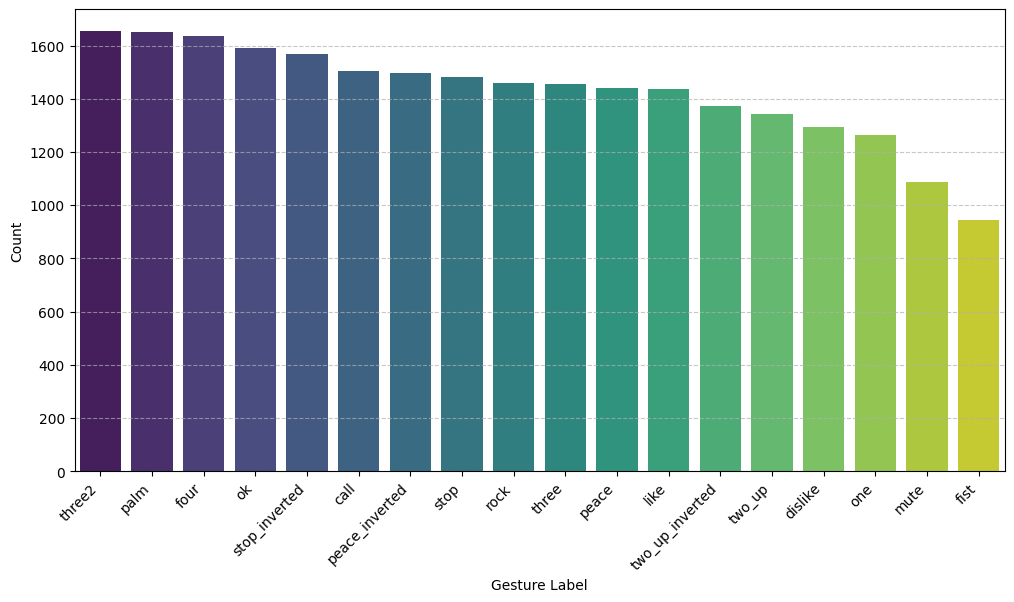

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="label", order=df["label"].value_counts().index, palette="viridis")
plt.xticks(rotation=45, ha="right")  
plt.xlabel("Gesture Label")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
X = df.drop(columns=["label"])  
y = df["label"]


smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced["label"] = y_resampled




C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_9192\373388710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_balanced, x="label", order=df["label"].value_counts().index, palette="viridis")


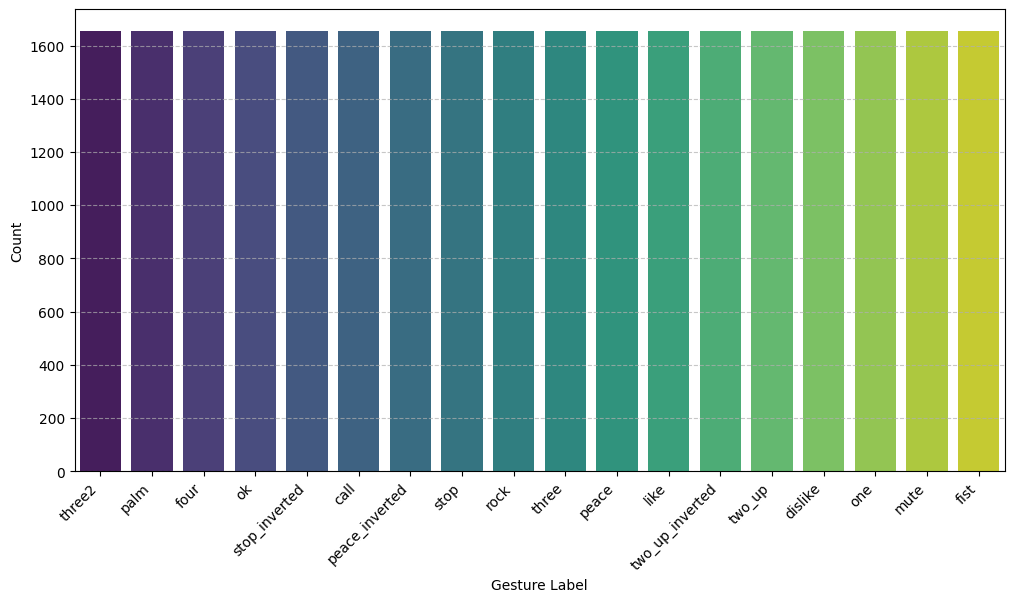

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_balanced, x="label", order=df["label"].value_counts().index, palette="viridis")
plt.xticks(rotation=45, ha="right")  
plt.xlabel("Gesture Label")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

In [16]:
df_balanced["label"].value_counts()

label
call               1653
dislike            1653
two_up             1653
three2             1653
three              1653
stop_inverted      1653
stop               1653
rock               1653
peace_inverted     1653
peace              1653
palm               1653
one                1653
ok                 1653
mute               1653
like               1653
four               1653
fist               1653
two_up_inverted    1653
Name: count, dtype: int64

In [17]:
df_encoded = pd.get_dummies(df_balanced, columns=["label"])

In [18]:
df_encoded.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,label_palm,label_peace,label_peace_inverted,label_rock,label_stop,label_stop_inverted,label_three,label_three2,label_two_up,label_two_up_inverted
0,0.0,0.0,-5.252426,-10.195847,-15.787010,-15.588074,-26.285431,-15.850983,-32.593300,-13.357376,...,False,False,False,False,False,False,False,False,False,False
1,0.0,0.0,-1.426741,-17.496765,6.728354,-34.523865,12.290045,-47.198486,11.118582,-58.760345,...,False,False,False,False,False,False,False,False,False,False
2,0.0,0.0,7.703602,-18.729457,19.502552,-36.561153,27.656651,-51.200132,27.015896,-63.625904,...,False,False,False,False,False,False,False,False,False,False
3,0.0,0.0,-0.473202,-11.044281,1.659931,-21.513245,2.708370,-29.720123,1.789913,-36.616425,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,-0.274384,-13.780403,3.187592,-30.717304,3.757233,-43.040176,-0.555725,-51.333578,...,False,False,False,False,False,False,False,False,False,False


In [49]:
df_encoded.to_csv("data/data_after_prepration.csv", index=False)

In [50]:
data = df_encoded
data.drop(columns=["x1","y1"],inplace=True)

In [51]:
data.head()

,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,...,label_palm,label_peace,label_peace_inverted,label_rock,label_stop,label_stop_inverted,label_three,label_three2,label_two_up,label_two_up_inverted
0,-5.252426,-10.195847,-15.787010,-15.588074,-26.285431,-15.850983,-32.593300,-13.357376,-24.539818,-24.070709,...,False,False,False,False,False,False,False,False,False,False
1,-1.426741,-17.496765,6.728354,-34.523865,12.290045,-47.198486,11.118582,-58.760345,24.997931,-37.965393,...,False,False,False,False,False,False,False,False,False,False
2,7.703602,-18.729457,19.502552,-36.561153,27.656651,-51.200132,27.015896,-63.625904,39.397076,-34.658640,...,False,False,False,False,False,False,False,False,False,False
3,-0.473202,-11.044281,1.659931,-21.513245,2.708370,-29.720123,1.789913,-36.616425,14.800335,-23.093109,...,False,False,False,False,False,False,False,False,False,False
4,-0.274384,-13.780403,3.187592,-30.717304,3.757233,-43.040176,-0.555725,-51.333578,14.032196,-30.901279,...,False,False,False,False,False,False,False,False,False,False
